<a href="https://colab.research.google.com/github/Alisoltan82/Heart_Failure_Classification/blob/main/The__Heart_failure_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session obiectives


1.   identify key features and feature importance for heart failure classification
2.   User the extracted features in design of a machine learning model with a robust performance (accuracy , F1-scores)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<Axes: ylabel='Frequency'>

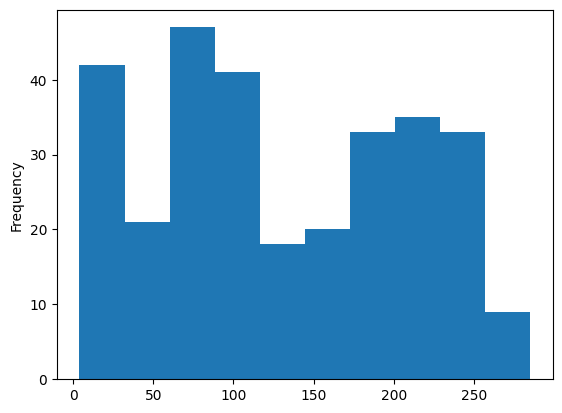

In [ ]:
data['time'].plot(kind = 'hist')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape , y.shape

((299, 12), (299,))

<Axes: >

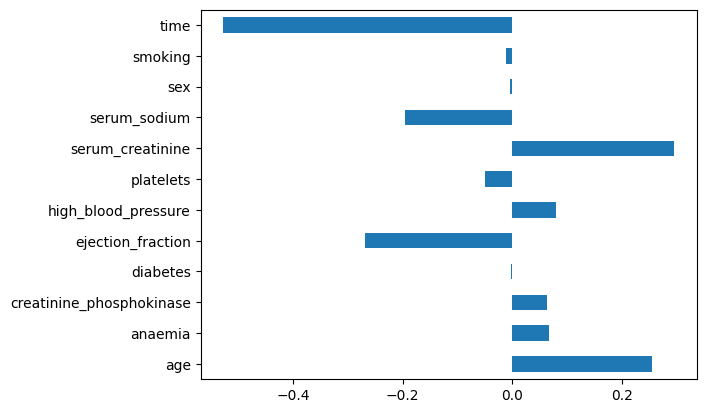

In [ ]:
corr_ = X.corrwith(y)
corr_
corr_.plot(kind = 'barh')



In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
cats = X.loc[:,(data.nunique() <= 3)]
Nums = X.loc[:,(data.nunique() > 3)]

In [ ]:
Nums

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [ ]:
#value distribution across categorical variables

for i in cats.columns:
  print(f'Unique values in {i} are {cats[i].unique()}')
  print(f'{i} value counts = {cats[i].value_counts()}')
  print('*' * 50)

Unique values in anaemia are [0 1]
anaemia value counts = 0    170
1    129
Name: anaemia, dtype: int64
**************************************************
Unique values in diabetes are [0 1]
diabetes value counts = 0    174
1    125
Name: diabetes, dtype: int64
**************************************************
Unique values in high_blood_pressure are [1 0]
high_blood_pressure value counts = 0    194
1    105
Name: high_blood_pressure, dtype: int64
**************************************************
Unique values in sex are [1 0]
sex value counts = 1    194
0    105
Name: sex, dtype: int64
**************************************************
Unique values in smoking are [0 1]
smoking value counts = 0    203
1     96
Name: smoking, dtype: int64
**************************************************


Check distribution of continuous variables

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'ejection_fraction'}>],
       [<Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'serum_sodium'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

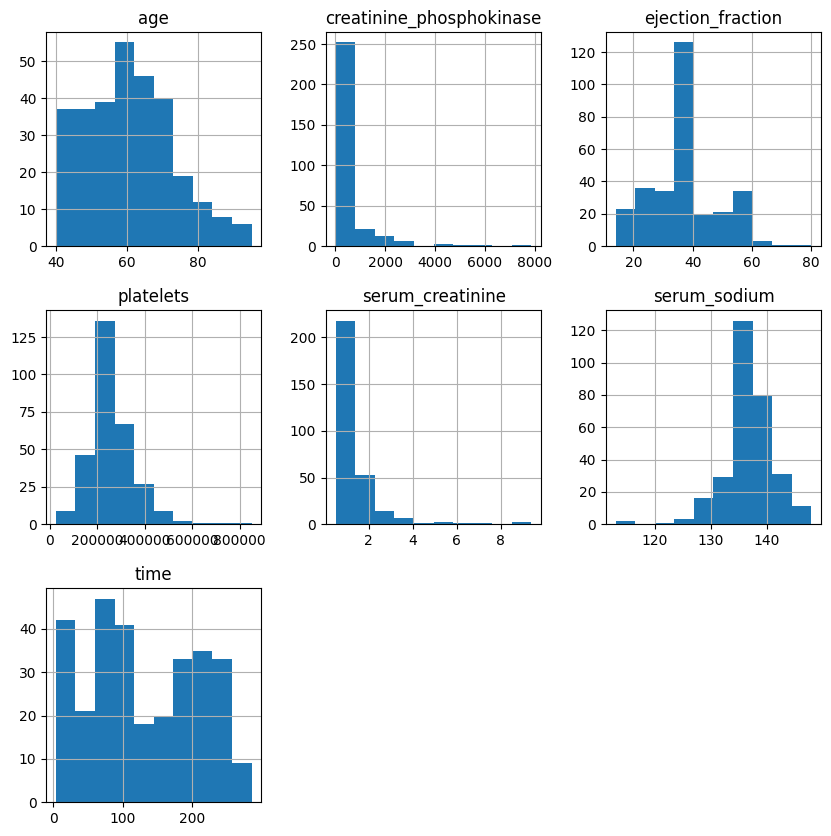

In [ ]:
data[Nums.columns].hist(figsize = (10,10))

In [ ]:
data[Nums.columns].skew()

age                         0.423062
creatinine_phosphokinase    4.463110
ejection_fraction           0.555383
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
time                        0.127803
dtype: float64

In [ ]:
#Input_features
Numerical_features = Nums.columns
categorical_features = cats.columns

In [ ]:
Numerical_features

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

visualize correlation between numerical variables in an attempts to identify patterns

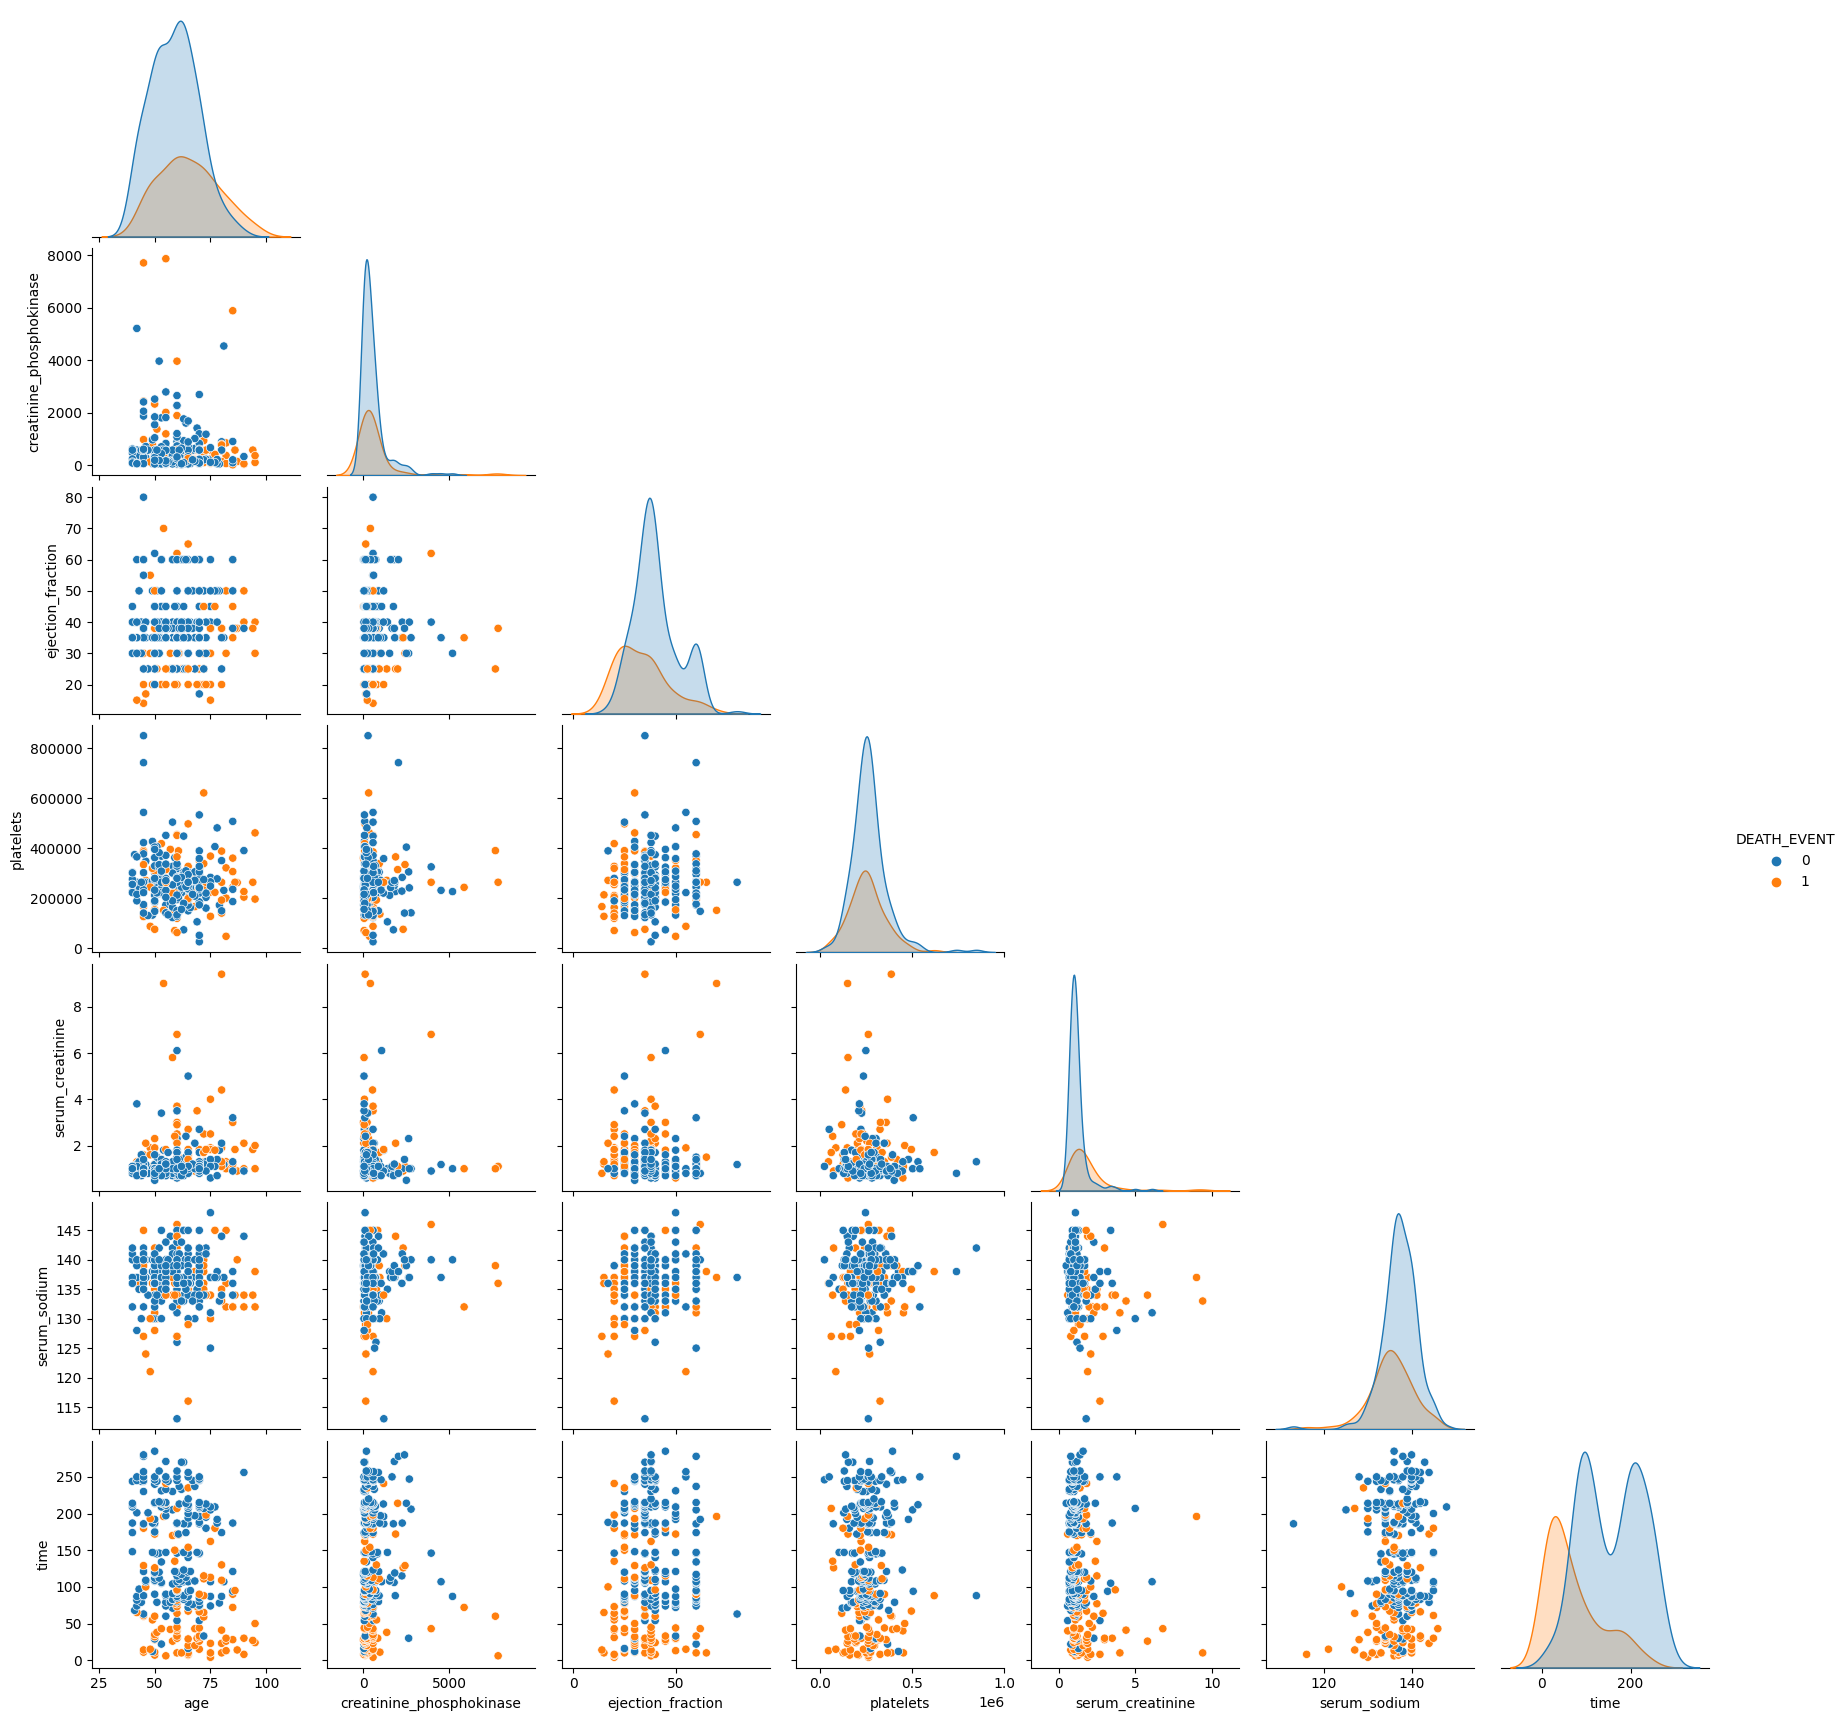

In [ ]:
sns.pairplot(
    data = data,
    vars = Numerical_features,
    hue = 'DEATH_EVENT' ,
    corner = True
)

##Notes


1.   Distribution for the 2 binary classes of 'DEATH_EVENT' is almost similar across all variables except in 'time' where patients with positive events tend to have less time (less medical monitoring).

2.   slight right with higer age. (age increase risk increase)

3.   slight left skewness with ejection fraction (inverse relation)
4.   slight right skweness with serum creatinine levels





<Axes: xlabel='serum_creatinine', ylabel='ejection_fraction'>

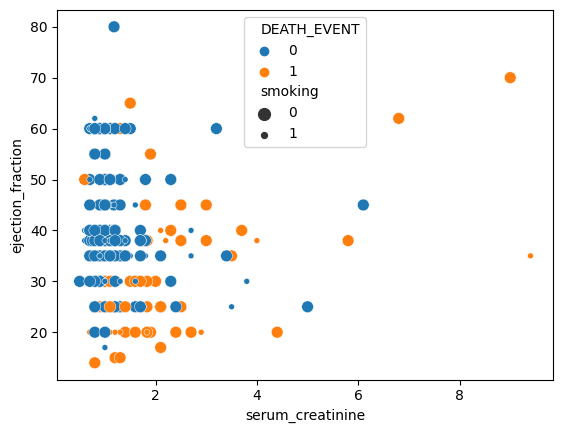

In [ ]:
sns.scatterplot(
    data = data ,
    x = 'serum_creatinine',
    y = 'ejection_fraction',
    hue = 'DEATH_EVENT',
    size = 'smoking'
)

In [ ]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

<Axes: >

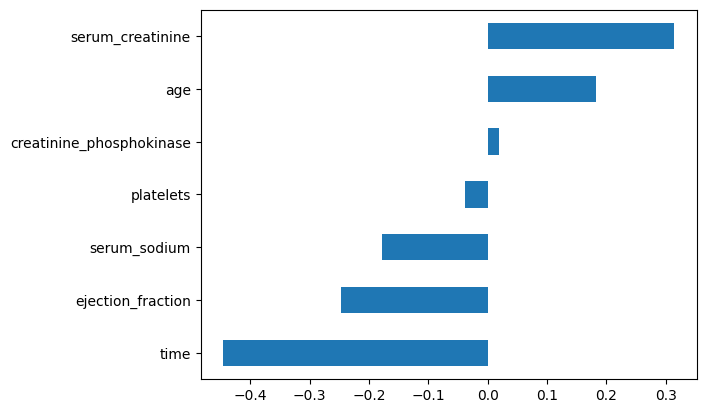

In [ ]:
X[Numerical_features].corrwith(y , method = 'kendall' ).sort_values(ascending = True).plot( kind = 'barh')

In [ ]:
data.groupby(['DEATH_EVENT'])[['serum_creatinine', 'ejection_fraction' ]].std()

,serum_creatinine,ejection_fraction
DEATH_EVENT,,
0,0.654083,10.859963
1,1.468562,12.525303


In [ ]:
data['feature_1'] = data.groupby(['serum_creatinine'])['ejection_fraction'].transform('std')

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,feature_1
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,14.703741
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,10.838812
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,13.402572
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,14.703741
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,10.408330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,10.838812
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,10.878695
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,14.151100
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,11.926860


In [ ]:
Numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time','feature_1']

In [ ]:
data['Risk'] = data['anaemia'] + data['diabetes'] + data['high_blood_pressure'] + data['smoking']

In [ ]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' ,'Risk' ]

In [ ]:
data.groupby(['DEATH_EVENT'])[['creatinine_phosphokinase' , 'serum_sodium',
                               'platelets' , 'serum_creatinine' , 'ejection_fraction' ]].agg(['median', 'std']).T

DEATH_EVENT                                  0              1
creatinine_phosphokinase median     245.000000     259.000000
                         std        753.799572    1316.580640
serum_sodium             median     137.000000     135.500000
                         std          3.982923       5.001579
platelets                median  263000.000000  258500.000000
                         std      97531.202283   98525.682856
serum_creatinine         median       1.000000       1.300000
                         std          0.654083       1.468562
ejection_fraction        median      38.000000      30.000000
                         std         10.859963      12.525303

In [ ]:
#patients with high periphral resistance , low ejection and high creatinine (trying to create a new feature)
high_risk_profile = data.loc[
     (data['ejection_fraction'] <= 30) & (data['serum_creatinine'] > 1.3)
]

high_risk_profile.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,feature_1,Risk
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,61.155567,0.466667,475.666667,0.500000,24.733333,0.400000,271993.00500,1.922667,133.666667,0.666667,0.200000,116.633333,0.766667,8.656324,1.566667
std,9.225872,0.507416,574.071444,0.508548,4.201259,0.498273,112280.50108,0.441939,5.261004,0.479463,0.406838,77.274024,0.430183,2.953690,0.897634
min,44.000000,0.000000,59.000000,0.000000,17.000000,0.000000,62000.00000,1.400000,116.000000,0.000000,0.000000,4.000000,0.000000,3.535534,0.000000
25%,56.000000,0.000000,128.750000,0.000000,20.000000,0.000000,210500.00000,1.625000,130.500000,0.000000,0.000000,49.000000,1.000000,7.211635,1.000000
50%,60.000000,0.000000,244.500000,0.500000,25.000000,0.000000,263358.03000,1.830000,134.500000,1.000000,0.000000,109.500000,1.000000,8.366600,1.500000
75%,67.250000,1.000000,582.000000,1.000000,30.000000,1.000000,305000.00000,2.100000,136.000000,1.000000,0.000000,185.250000,1.000000,9.774863,2.000000
max,75.000000,1.000000,2656.000000,1.000000,30.000000,1.000000,621000.00000,3.500000,144.000000,1.000000,1.000000,244.000000,1.000000,16.201852,3.000000


In [ ]:
high_risk_profile['DEATH_EVENT'].value_counts()

1    23
0     7
Name: DEATH_EVENT, dtype: int64

can consider as an additional feature based on model performance results (feature_2) however, 30 patients are still 10% of the total dataset but may support f1_score if the model performs poorly

In [ ]:
data[Numerical_features]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,feature_1
0,75.0,582,20,265000.00,1.9,130,4,14.703741
1,55.0,7861,38,263358.03,1.1,136,6,10.838812
2,65.0,146,20,162000.00,1.3,129,7,13.402572
3,50.0,111,20,210000.00,1.9,137,7,14.703741
4,65.0,160,20,327000.00,2.7,116,8,10.408330
...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,10.838812
295,55.0,1820,38,270000.00,1.2,139,271,10.878695
296,45.0,2060,60,742000.00,0.8,138,278,14.151100
297,45.0,2413,38,140000.00,1.4,140,280,11.926860


<Axes: >

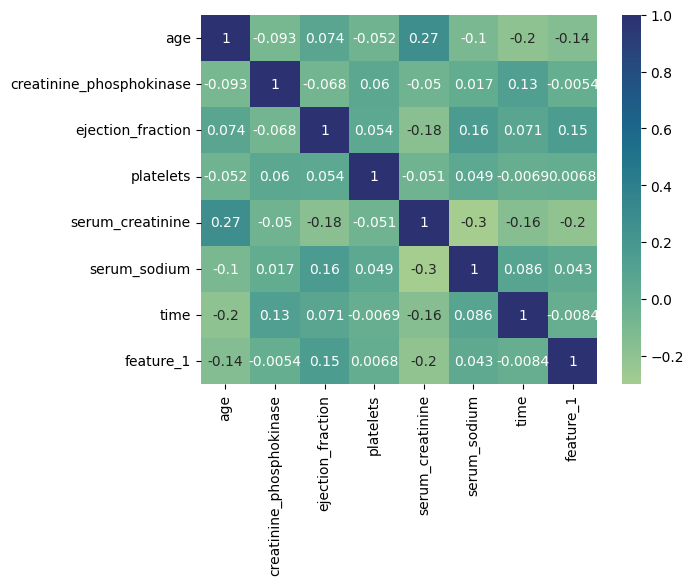

In [ ]:
sns.heatmap(data[Numerical_features].corr(method = 'spearman') , annot = True , cmap = 'crest' )

<Axes: xlabel='Risk'>

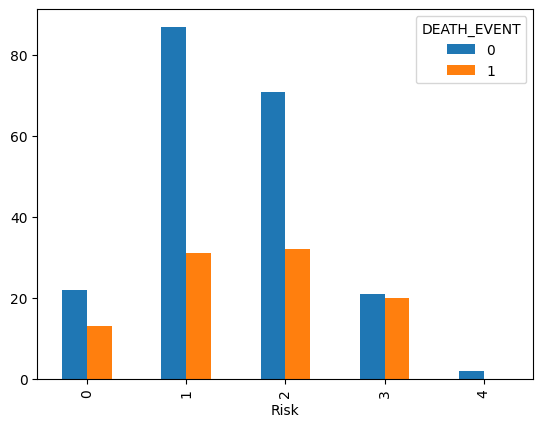

In [ ]:
data.groupby(['Risk'])[['DEATH_EVENT']].value_counts().unstack().plot(kind = 'bar' )

In [ ]:
from math import remainder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#creating power function for skewed numerical variables
power = PowerTransformer(method = 'box-cox' , standardize= True)

In [ ]:
#numerical pipeline

numeric_transformer = Pipeline(
    steps = [
        ('power' , power),
        ('scaler' , StandardScaler())
    ]
)

In [ ]:
#column transformer

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', numeric_transformer , Numerical_features)],remainder = 'passthrough')

In [ ]:
#adding the model to pipeline

clf = Pipeline(
    steps = [
        ('preprocess' , preprocessor),
        ('model', RandomForestClassifier())
    ]
)

In [ ]:
clf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time',
                                                   'feature_1'])])),
                ('model', RandomForestClassifier())])

In [ ]:
data.dropna(inplace = True)

In [ ]:
X = data.drop(columns = 'DEATH_EVENT' , axis = 1)
y = data['DEATH_EVENT']

X.shape , y.shape

((282, 14), (282,))

In [ ]:
#train test split

from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest , mutual_info_classif , chi2 , f_classif
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y  ,shuffle = True, test_size = 0.2 , random_state = 42)

In [ ]:
#model fit and predictions

clf.fit(X_train , y_train)
y_hat = clf.predict(X_test)

In [ ]:
features_importance = clf['model'].feature_importances_

In [ ]:
#feature importance dataframe by Randomforestclassifier

features_importance = pd.DataFrame(data = features_importance * 100,
                                   index = X_train.columns)

features_importance

,0
age,10.045546
anaemia,8.903490
creatinine_phosphokinase,11.779165
diabetes,6.570061
ejection_fraction,9.858077
high_blood_pressure,7.155511
platelets,28.647858
serum_creatinine,7.706464
serum_sodium,1.674628
sex,1.168219


<Axes: >

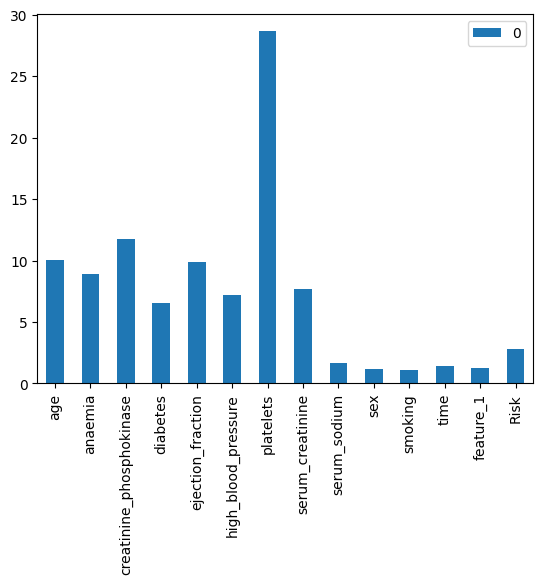

In [ ]:
features_importance.plot(kind = 'bar')

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score

confusion_matrix(y_test , y_hat)

array([[38,  4],
       [ 3, 12]])

In [ ]:
f1_score(y_test , y_hat) , accuracy_score(y_test , y_hat)

(0.7741935483870969, 0.8771929824561403)

In [ ]:
clf['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Grid search for best parameters selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [ 4, 6, 8, 10],
          'n_estimators': [4,10 ,20 ,70 , 200 , 400]}
calssifier = RandomForestClassifier()
Grid = GridSearchCV(
    estimator = calssifier,
    param_grid = params,
    scoring= 'f1',
    refit=True
)

In [ ]:
clf_3 = Pipeline(
    steps = [
        ('preprocess' , preprocessor)
    ]
)

In [ ]:
clf_3.fit(X_train)

X_train_sc = clf_3.transform(X_train)
X_test_sc = clf_3.transform(X_test)

In [ ]:
Grid.fit(X_train_sc , y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'n_estimators': [4, 10, 20, 70, 200, 400]},
             scoring='f1')

In [ ]:
Grid.best_score_ , Grid.best_estimator_

(0.7284188034188035, RandomForestClassifier(max_depth=8, n_estimators=10))

In [ ]:
model = RandomForestClassifier(n_estimators= 10,
                               max_depth= 8)

model.fit(X_train_sc , y_train)

RandomForestClassifier(max_depth=8, n_estimators=10)

In [ ]:
preds = model.predict(X_test_sc)
f1_score(y_test , preds) , accuracy_score(y_test , preds)

(0.7741935483870969, 0.8771929824561403)

In [ ]:
confusion_matrix(y_test , preds)

array([[38,  4],
       [ 2, 13]])

No major improvements in predictions by Gridsearch (accuracy , f1-score)

In [ ]:
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.7 MB/s eta 0:00:00


#Feature selection for model improvements

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection

In [ ]:
X_train_sc.shape

(225, 14)

In [ ]:
scs = SmartCorrelatedSelection(threshold=0.5)
X_train_df = pd.DataFrame(data = X_train_sc,
                          columns = X_train.columns)
X_train_new = scs.fit_transform(X_train_df)
X_train_new.shape

(225, 13)

In [ ]:
X_train_new.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'feature_1'],
      dtype='object')

In [ ]:
model.fit(X_train_new , y_train)
X_test_df = pd.DataFrame(data = X_test_sc,
                          columns = X_test.columns)
X_test_new = scs.transform(X_test_df)

y_hat_1 = model.predict(X_test_new)
f1_score(y_test , y_hat_1) , accuracy_score(y_test , y_hat_1)

(0.8387096774193549, 0.9122807017543859)

In [ ]:
from feature_engine.selection import RecursiveFeatureElimination

rfe = RecursiveFeatureElimination(RandomForestClassifier(random_state=2), cv=2)
X_train_2 = rfe.fit_transform(X_train_sc, y_train)
X_train_2

,x0,x1,x2,x4,x6
0,-0.843824,-0.831715,0.691994,-0.688926,-0.041648
1,-1.997786,-0.963725,0.292429,-1.134172,0.762063
2,0.495067,-0.724397,-0.632168,0.996048,-1.596046
3,0.869785,-0.441232,1.722522,-0.016219,0.299616
4,-0.843824,1.535992,-0.145591,0.195970,-0.029022
...,...,...,...,...,...
220,-1.386929,0.103569,1.722522,-0.322982,0.751217
221,-0.355216,0.180796,0.691994,-0.688926,-0.640173
222,0.088630,0.859600,0.292429,0.245114,-0.397658
223,-1.386929,0.649540,1.402424,-0.322982,1.411088


In [ ]:
X_test_2 = rfe.transform(X_test_sc)

In [ ]:
model_2 = RandomForestClassifier()

model_2.fit(X_train_2 , y_train)
y_hat_2 = model_2.predict(X_test_2)

In [ ]:
f1_score(y_test , y_hat_2) , accuracy_score(y_test , y_hat_2)

(0.8125, 0.8947368421052632)

slight improvement upon feature recursive elemination

In [ ]:
#tensorflow model
import tensorflow as tf


In [ ]:
#NN model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30 , activation = 'relu'),
    tf.keras.layers.Dense(30 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_3.fit(X_train_sc, y_train , epochs = 100)

Epoch 1/100
8/8 [==============================] - 7s 12ms/step - loss: 0.6557 - accuracy: 0.6356
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6248 - accuracy: 0.6933
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6014 - accuracy: 0.7156
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 0.5817 - accuracy: 0.7289
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5628 - accuracy: 0.7556
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.5452 - accuracy: 0.7600
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5285 - accuracy: 0.7733
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5141 - accuracy: 0.7733
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4971 - accuracy: 0.7733
Epoch 10/100
8/8 [==============================] - 0s 21ms/step - loss: 0.4800 - accuracy: 0.7822
Epoch 11/100
8/8 [==

In [ ]:
y_hat_probs = model_3.predict(X_test_sc)

2/2 [==============================] - 1s 8ms/step


In [ ]:
y_hat_3 = tf.round(y_hat_probs)
f1_score(y_test , y_hat_3) , accuracy_score(y_test , y_hat_3)

(0.6451612903225806, 0.8070175438596491)

In [ ]:
############ working on better feature selection with different pipelines #####################################

In [ ]:
#New pipline with features elemination parameters

scaler = StandardScaler().set_output(transform = 'pandas')

Numerical_pipe = Pipeline(
    steps = [
        ('pwer_t' , power),
        ('scaler' , scaler),
        ('selector' , SelectKBest(score_func = f_classif , k = 3))
    ]
)

categorical_pipe = Pipeline(
    steps = [
        ('select' , SelectKBest(score_func= mutual_info_classif , k = 2))
    ]
)

In [ ]:
processor = ColumnTransformer(
    transformers = [
    ('num', Numerical_pipe, Numerical_features),
    ('cat', categorical_pipe , categorical_features)
    ],
    remainder = 'passthrough'
)

In [ ]:
preprocessor.set_output(transform = 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer(method='box-cox')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'creatinine_phosphokinase',
                                  'ejection_fraction', 'platelets',
                                  'serum_creatinine', 'serum_sodium', 'time',
                                  'feature_1'])])

In [ ]:
processor.fit(X_train , y_train)
X_train_pro = processor.transform(X_train)
X_test_pro = processor.transform(X_test)

X_train_pro.shape , X_test_pro.shape

((225, 5), (57, 5))

In [ ]:
X_train_pro

array([[ 0.69199372, -0.68892571, -0.04164803,  1.        ,  2.        ],
       [ 0.29242916, -1.13417164,  0.76206314,  0.        ,  1.        ],
       [-0.63216797,  0.99604759, -1.59604624,  1.        ,  3.        ],
       ...,
       [ 0.29242916,  0.24511437, -0.39765762,  1.        ,  3.        ],
       [ 1.40242405, -0.32298239,  1.41108804,  0.        ,  1.        ],
       [ 1.72252196,  0.24511437, -0.41147679,  0.        ,  1.        ]])

In [ ]:
model_6 = RandomForestClassifier()

model_6.fit(X_train_pro , y_train)
y_hat_6 = model_6.predict(X_test_pro)

accuracy_score(y_test , y_hat_6)


0.9473684210526315

Best result so far with 5 features out of 12 original + 2 created

In [ ]:
dataframe = pd.DataFrame(
    data = X_train_pro,
    columns = processor.get_feature_names_out()
)

In [ ]:
dataframe #selected columns that matches previous findings (categorical , Numerical)

,num__ejection_fraction,num__serum_creatinine,num__time,cat__high_blood_pressure,cat__Risk
0,0.691994,-0.688926,-0.041648,1.0,2.0
1,0.292429,-1.134172,0.762063,0.0,1.0
2,-0.632168,0.996048,-1.596046,1.0,3.0
3,1.722522,-0.016219,0.299616,1.0,3.0
4,-0.145591,0.195970,-0.029022,0.0,2.0
...,...,...,...,...,...
220,1.722522,-0.322982,0.751217,1.0,2.0
221,0.691994,-0.688926,-0.640173,1.0,1.0
222,0.292429,0.245114,-0.397658,1.0,3.0
223,1.402424,-0.322982,1.411088,0.0,1.0


                                 0
num__ejection_fraction    0.178028
num__serum_creatinine     0.216725
num__time                 0.516676
cat__high_blood_pressure  0.023227
cat__Risk                 0.065344


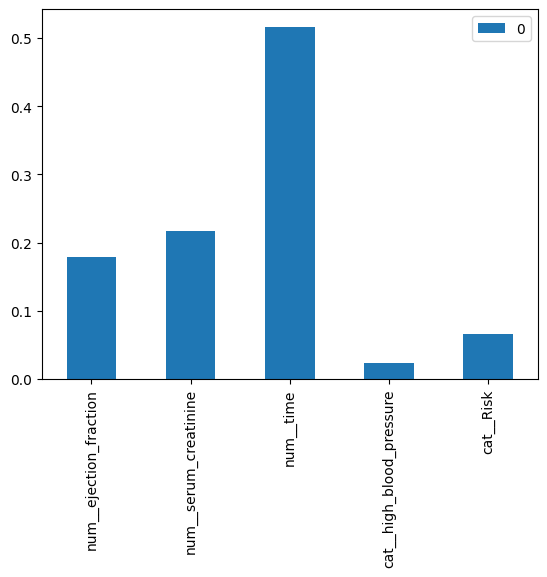

In [ ]:
#visualize top selected features by importance

feat = model_6.feature_importances_

feat_df = pd.DataFrame(
    data = feat,
    index = processor.get_feature_names_out()
)

feat_df.plot(kind = 'bar')
print(feat_df)

In [ ]:
results = pd.DataFrame({'actual':y_test.values,
                         'prediction': y_hat_6})
results

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0
